In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical 
from keras.layers.convolutional import Conv2D,MaxPooling2D

Using TensorFlow backend.


In [0]:
(xtr,ytr),(xts,yts)=mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(xtr.shape[0])
print(ytr.shape)

60000
(60000, 10)


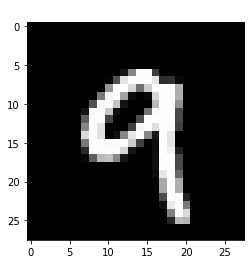

In [0]:
plt.imshow(xtr[110],cmap='gray')
plt.title(ytr[110],color='w')
plt.show()

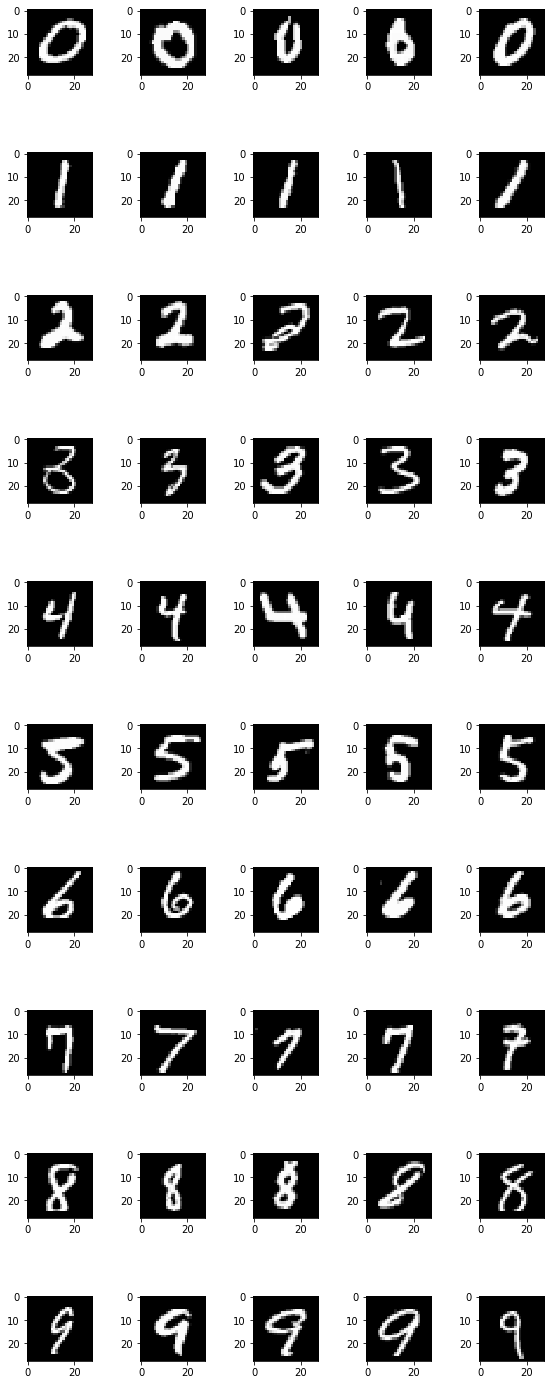

In [0]:
n_classes=10
n_cols=5
fig,axes=plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(8,20))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
      selected_images=xtr[ytr==j]
      img=selected_images[random.randint(0,len(selected_images)-1),:,:]
      axes[j][i].imshow(img,cmap='gray')

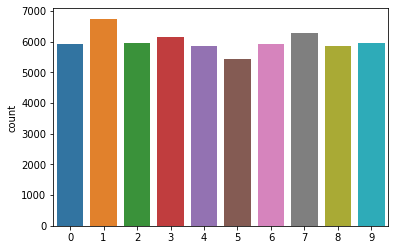

In [0]:
sns.countplot(ytr)
plt.show()

In [0]:
xtr=(xtr.reshape(xtr.shape[0],28,28,1))/255
xts=(xts.reshape(xts.shape[0],28,28,1))/255

In [0]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [0]:
model=Sequential()
model.add(Conv2D(16,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1638912   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 1,657,290
Trainable params: 1,657,290
Non-trainable params: 0
____________________________________________

In [0]:
h=model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.1719 - acc: 0.9509 - val_loss: 0.0985 - val_acc: 0.9716
Epoch 2/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.1037 - acc: 0.9709 - val_loss: 0.0907 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0924 - acc: 0.9762 - val_loss: 0.0951 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0906 - acc: 0.9781 - val_loss: 0.1234 - val_acc: 0.9717
Epoch 5/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0971 - acc: 0.9775 - val_loss: 0.1119 - val_acc: 0.9732
Epoch 6/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0914 - acc: 0.9804 - val_loss: 0.1178 - val_acc: 0.9709
Epoch 7/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.1010 - acc: 0.9806 - val_loss: 0.